In [2]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%autoreload 2


In [4]:
import os
import sys
import importlib

sys.path.append(os.path.abspath('../scripts'))

from Feature_Engineering import Feature_Engineering






In [23]:
from Feature_Engineering import (
    Feature_Engineering,
    extract_features,
    creating_aggregate_features,
    Standardize_numeical_features,
    check_missing_values,
    constructinf_RFMS_scores,
    assign_good_and_bad_lables
)  

In [6]:

path = '../data/data.csv'
fe = Feature_Engineering(path)

fe.data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [7]:
fe.total_transaction_amount()


Filtered Data for Total Transaction Amount:
           TransactionId         BatchId       AccountId       SubscriptionId  \
0   TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
2   TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3     TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
5   TransactionId_23223   BatchId_25954  AccountId_1078  SubscriptionId_4238   
6  TransactionId_118063  BatchId_118460  AccountId_2442  SubscriptionId_1980   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
5  CustomerId_1432          UGX          256  ProviderId_6   ProductId_3   
6  CustomerId_2858          UGX          256  ProviderId_5   ProductId_3   

  ProductCategory

,CustomerId,total_transaction_amount
0,CustomerId_1001,25200.0
1,CustomerId_1002,4500.0
2,CustomerId_1003,26000.0
3,CustomerId_1004,2000.0
4,CustomerId_1005,55000.0
...,...,...
3627,CustomerId_992,26000.0
3628,CustomerId_993,26000.0
3629,CustomerId_994,578000.0
3630,CustomerId_996,145000.0


aggregates the transaction amounts for each customer. Specifically, it groups the data by CustomerId and calculates the sum of the Amount for each customer

In [9]:
fe.average_transaction_amount()

Filtered Data for Average Transaction Amount:
           TransactionId         BatchId       AccountId       SubscriptionId  \
0   TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
2   TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3     TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
5   TransactionId_23223   BatchId_25954  AccountId_1078  SubscriptionId_4238   
6  TransactionId_118063  BatchId_118460  AccountId_2442  SubscriptionId_1980   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
5  CustomerId_1432          UGX          256  ProviderId_6   ProductId_3   
6  CustomerId_2858          UGX          256  ProviderId_5   ProductId_3   

  ProductCatego

,CustomerId,average_transaction_amount
0,CustomerId_1001,8400.000000
1,CustomerId_1002,900.000000
2,CustomerId_1003,6500.000000
3,CustomerId_1004,2000.000000
4,CustomerId_1005,9166.666667
...,...,...
3627,CustomerId_992,6500.000000
3628,CustomerId_993,8666.666667
3629,CustomerId_994,9475.409836
3630,CustomerId_996,9666.666667


In [7]:
 
data_with_aggregates = creating_aggregate_features(fe.data)
data_with_aggregates.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


In [8]:
# Call the standalone function to create aggregated features
aggregates_data= creating_aggregate_features(fe.data)


In [9]:
aggregates_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


In [10]:

data_with_features = extract_features(aggregates_data)


INFO:Feature_Engineering:extracing some features


In [11]:
data_with_features.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018


##Extracted Transaction Features
The above new columns were added to the DataFrame based on the transaction timestamp (TransactionStartTime):

TransactionHour: The hour of the day when the transaction occurred.

TransactionDay: The day of the month when the transaction occurred.

TransactionMonth: The month when the transaction occurred.

TransactionYear: The year when the transaction occurred

Identify Categorical Columns for Encoding

In [12]:
ef = data_with_features
print(ef.dtypes)

TransactionId                              object
BatchId                                    object
AccountId                                  object
SubscriptionId                             object
CustomerId                                 object
CurrencyCode                               object
CountryCode                                 int64
ProviderId                                 object
ProductId                                  object
ProductCategory                            object
ChannelId                                  object
Amount                                    float64
Value                                       int64
TransactionStartTime          datetime64[ns, UTC]
PricingStrategy                             int64
FraudResult                                 int64
Total_Transaction_Amount                  float64
Average_Transaction_Amount                float64
Transaction_Count                           int64
Std_Transaction_Amount                    float64


In [13]:
# Identify categorical columns in the 'ef' DataFrame
categorical_columns = data_with_features.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId'],
      dtype='object')


In [14]:


data_encoded = fe.encoding(data_with_features)


INFO:Feature_Engineering:encoding the categorical variables
INFO:Feature_Engineering:label encoding for ordinal categorical variables
INFO:Feature_Engineering:Checking data types of columns for WOE encoding
INFO:Feature_Engineering:TransactionId                              object
BatchId                                    object
AccountId                                  object
SubscriptionId                             object
CustomerId                                 object
CurrencyCode                               object
CountryCode                                 int64
ProviderId                                 object
ProductId                                  object
ProductCategory                            object
ChannelId                                  object
Amount                                    float64
Value                                       int64
TransactionStartTime          datetime64[ns, UTC]
PricingStrategy                             int64
FraudResult       

In [15]:
data_encoded.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,CurrencyCode_WOE,ProviderId_WOE,ProductId_WOE,ProductCategory_WOE
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,256,5,1,0,...,119,3042.294251,2,15,11,2018,0.0,3.137005,1.645067,1.620379
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,256,3,19,2,...,119,3042.294251,2,15,11,2018,0.0,2.736867,4.189243,-0.565446
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,256,5,0,0,...,2,0.000000,2,15,11,2018,0.0,3.137005,inf,1.620379
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,256,0,11,8,...,38,17169.241610,3,15,11,2018,0.0,-1.618899,-0.271621,-1.134962
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,256,3,19,2,...,38,17169.241610,3,15,11,2018,0.0,2.736867,4.189243,-0.565446


In [16]:

#from Feature_Engineering import check_missing_values

# Assuming data_encoded is your DataFrame
missing_values = check_missing_values(data_encoded)
print(missing_values)

Missing values in each column:
 TransactionId                   0
BatchId                         0
AccountId                       0
SubscriptionId                  0
CustomerId                      0
CurrencyCode                    0
CountryCode                     0
ProviderId                      0
ProductId                       0
ProductCategory                 0
ChannelId                       0
Amount                          0
Value                           0
TransactionStartTime            0
PricingStrategy                 0
FraudResult                     0
Total_Transaction_Amount        0
Average_Transaction_Amount      0
Transaction_Count               0
Std_Transaction_Amount        712
Transaction_Hour                0
Transaction_Day                 0
Transaction_Month               0
Transaction_Year                0
CurrencyCode_WOE                0
ProviderId_WOE                  0
ProductId_WOE                   0
ProductCategory_WOE             0
dtype: int64
Tra

The missing values in the Std_Transaction_Amount column likely arose because the standard deviation (std) cannot be calculated for customers who have only one transaction. Standard deviation measures the variation or spread of a set of values. If a customer has only a single transaction, there's no variation to measure, and hence the standard deviation is undefined, resulting in a NaN.

In [17]:
# Fill missing values in 'Std_Transaction_Amount' with zero
data_encoded['Std_Transaction_Amount'].fillna(0, inplace=True)


C:\Users\Dagi\AppData\Local\Temp\ipykernel_2748\2773339636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_encoded['Std_Transaction_Amount'].fillna(0, inplace=True)


In [18]:
# Recheck for missing values
missing_values = check_missing_values(data_encoded)
print(missing_values)

Missing values in each column:
 TransactionId                 0
BatchId                       0
AccountId                     0
SubscriptionId                0
CustomerId                    0
CurrencyCode                  0
CountryCode                   0
ProviderId                    0
ProductId                     0
ProductCategory               0
ChannelId                     0
Amount                        0
Value                         0
TransactionStartTime          0
PricingStrategy               0
FraudResult                   0
Total_Transaction_Amount      0
Average_Transaction_Amount    0
Transaction_Count             0
Std_Transaction_Amount        0
Transaction_Hour              0
Transaction_Day               0
Transaction_Month             0
Transaction_Year              0
CurrencyCode_WOE              0
ProviderId_WOE                0
ProductId_WOE                 0
ProductCategory_WOE           0
dtype: int64
TransactionId                 0
BatchId                    

In [19]:
# Standardize numerical features and display
data_standardized = Standardize_numeical_features(data_encoded)


INFO:Feature_Engineering:normalize the numerical features
INFO:Feature_Engineering:the result of the standardized numeical featuresis  
      Amount     Value  Total_Transaction_Amount  Average_Transaction_Amount  \
0 -0.046371 -0.072291                  0.170118                   -0.067623   
1 -0.054643 -0.080251                  0.170118                   -0.067623   
2 -0.050426 -0.076352                  0.165122                   -0.072568   
3  0.107717  0.096648                  0.175567                   -0.008155   
4 -0.059704 -0.075183                  0.175567                   -0.008155   

   Transaction_Count  Std_Transaction_Amount  
0          -0.311831               -0.167016  
1          -0.311831               -0.167016  
2          -0.444993               -0.201209  
3          -0.404020               -0.008243  
4          -0.404020               -0.008243  


In [20]:
data_standardized.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,CurrencyCode_WOE,ProviderId_WOE,ProductId_WOE,ProductCategory_WOE
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,256,5,1,0,...,-0.311831,-0.167016,2,15,11,2018,0.0,3.137005,1.645067,1.620379
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,256,3,19,2,...,-0.311831,-0.167016,2,15,11,2018,0.0,2.736867,4.189243,-0.565446
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,256,5,0,0,...,-0.444993,-0.201209,2,15,11,2018,0.0,3.137005,inf,1.620379
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,256,0,11,8,...,-0.404020,-0.008243,3,15,11,2018,0.0,-1.618899,-0.271621,-1.134962
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,256,3,19,2,...,-0.404020,-0.008243,3,15,11,2018,0.0,2.736867,4.189243,-0.565446


INFO:Feature_Engineering:constructing the RFMS scores
INFO:Feature_Engineering:Calculate Recency as days since last transaction
INFO:Feature_Engineering:visualizing the RFMS space


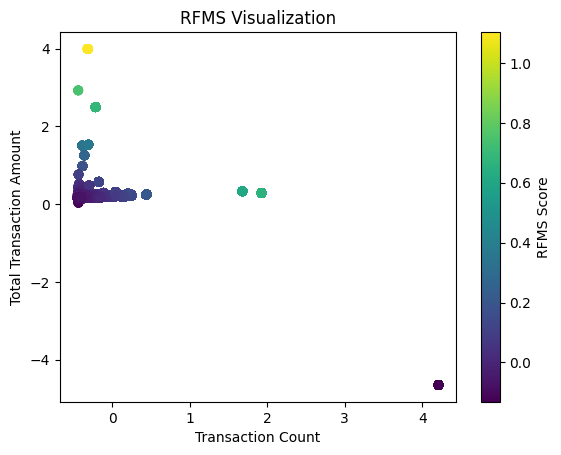

INFO:Feature_Engineering:assigning the good and bad labels
c:\Users\Dagi\Documents\KAIM\week-6\Credit-scorin-model\scripts\Feature_Engineering.py:219: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Label'] = np.where(data['RFMS_score'] > threshold, 'Good', 'Bad')
c:\Users\Dagi\Documents\KAIM\week-6\Credit-scorin-model\scripts\Feature_Engineering.py:220: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. T

RFMS Score and Labels after assignment:
    RFMS_score Label
0   -0.042337  Good
1   -0.042337  Good
2   -0.083785   Bad
3   -0.068359   Bad
4   -0.068359   Bad
Label Distribution after assignment:
 Label
Good    47831
Bad     47831
Name: count, dtype: int64


c:\Users\Dagi\Documents\KAIM\week-6\Credit-scorin-model\week-6\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
INFO:Feature_Engineering:WoE results calculated successfully


WoE Results:
       RFMS_score  count  event  non_event  woe
0       -0.131048     12    0.0       12.0  0.0
1       -0.131047     16    0.0       16.0  0.0
2       -0.131047   1999    0.0     1999.0  0.0
3       -0.131047      6    0.0        6.0  0.0
4       -0.131046      6    0.0        6.0  0.0
...           ...    ...    ...        ...  ...
20814    1.103065      9    0.0        9.0  0.0
20815    1.103066     21    0.0       21.0  0.0
20816    1.103066     40    0.0       40.0  0.0
20817    1.103066     37    0.0       37.0  0.0
20818    1.103066      4    0.0        4.0  0.0

[20819 rows x 5 columns]
RFMS Score and Labels after assignment:
    RFMS_score Label
0   -0.042337  Good
1   -0.042337  Good
2   -0.083785   Bad
3   -0.068359   Bad
4   -0.068359   Bad
Label Distribution after assignment:
 Label
Good    47831
Bad     47831
Name: count, dtype: int64


c:\Users\Dagi\Documents\KAIM\week-6\Credit-scorin-model\scripts\Feature_Engineering.py:219: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Label'] = np.where(data['RFMS_score'] > threshold, 'Good', 'Bad')
c:\Users\Dagi\Documents\KAIM\week-6\Credit-scorin-model\scripts\Feature_Engineering.py:220: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate

In [24]:
data = constructinf_RFMS_scores(data_standardized)
data = assign_good_and_bad_lables(data)



In [53]:
label_counts = data_standardized['Label'].value_counts()
print("Label Distribution:\n", label_counts)


Label Distribution:
 Series([], Name: count, dtype: int64)


In [25]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Transaction_Day,Transaction_Month,Transaction_Year,CurrencyCode_WOE,ProviderId_WOE,ProductId_WOE,ProductCategory_WOE,Recency,RFMS_score,Label
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,256,5,1,0,...,15,11,2018,0.0,3.137005,1.645067,1.620379,2264,-0.042337,Good
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,256,3,19,2,...,15,11,2018,0.0,2.736867,4.189243,-0.565446,2264,-0.042337,Good
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,256,5,0,0,...,15,11,2018,0.0,3.137005,inf,1.620379,2264,-0.083785,Bad
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,256,0,11,8,...,15,11,2018,0.0,-1.618899,-0.271621,-1.134962,2264,-0.068359,Bad
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,256,3,19,2,...,15,11,2018,0.0,2.736867,4.189243,-0.565446,2264,-0.068359,Bad
